# Data extraction - easier method

As we finally found out, Project S early teams chose to derive data from difficult sources so that they can have something to do, which is anti-productive. We opt to use data from easier resources - and much faster.

## Sun and planets

In [1]:
import solarsystem

In [2]:
year = 118
month = 1
day = 1
hour = 0.5
minute = 0
UT = 0
plane = 'equatorial'
UT=0
dst=0
G = solarsystem.Geocentric(year, month, day, hour, minute, UT, dst, plane)

In [3]:
print(G.position())

{'Sun': (266.2324268619017, -23.638653233097223, 0.9831532685190087), 'Mercury': (245.59234209136014, -21.60365792339946, 1.2494240399483465), 'Venus': (256.241204322464, -18.527316782891702, 0.2715917150427914), 'Mars': (142.21145549482105, 18.7014268396813, 0.8643129254916414), 'Jupiter': (145.40875667474344, 15.318438370307515, 4.79295620673602), 'Saturn': (60.20306769135474, 19.26696578910415, 8.063918225583105), 'Uranus': (147.7600371022431, 13.98485026723559, 17.852118840464613), 'Neptune': (131.9389209310906, 18.67522227971874, 29.341683995221867), 'Pluto': (15.015845772723981, -11.508688899652965, 48.95605164566121), 'Ceres': (236.78371027465255, -16.221148702573878, 3.594453473373109), 'Chiron': (62.03524134311502, 16.809188401562327, 13.899288007800276), 'Eris': (322.1654395152198, -61.429954034214695, 68.73361767817185)}


In [4]:
from PyAstronomy import pyasl
import datetime
import numpy as np

def get_altaz_by_dec(dec,JD):
    # Latitude of the observer. East Han Capital 34.6202° N, 112.4539° E
    lat = np.zeros(dec.size)+34.6202
    # Hour angle. East Han Capital 34.6202° N, 112.4539° E
    ha = np.zeros(dec.size)+112.4539+(JD-np.floor(JD))*360
    altaz = pyasl.hadec2altaz(ha, dec, lat)
    return altaz

In [5]:
import jdcal # functions for converting between Julian dates and calendar dates

In [6]:
def get_JD_from_date(year,month,day):
    """
    Convert calendar day to Julian Day
    """

    return sum(jdcal.gcal2jd(year, month, day))

In [7]:
from jdcal import MJD_0
def get_date_from_JD(JD):
    """
    Convert Julian Day to calendar day
    """
    return jdcal.jd2gcal(MJD_0,JD-MJD_0)

In [8]:
start_date = get_JD_from_date(118,1,1) # Set a start date (year, month day)
end_date = get_JD_from_date(218,1,1) # Set and end date

# Number of days
n_days = end_date - start_date

n_daily_samples = 24 # Set how many measurments to collect every day
                    # at evenly spaced invtervals

# Number of samples
n_samples = int(n_daily_samples * n_days)

In [9]:
JD_array = np.arange(start_date,end_date,(end_date-start_date)/n_samples)

In [10]:
minute = 0
UT = 0
plane = 'equatorial'
UT=0
dst=0
position = {}

for JD in JD_array:
    year,month,day,hour = get_date_from_JD(JD)
    hour = hour *24

    G = solarsystem.Geocentric(year, month, day, hour, minute, UT, dst, plane)
    position[JD]=G.position()
    

In [11]:
import pandas as pd
df = pd.DataFrame.from_dict(position)

In [12]:
df = df.T

In [13]:
df

,Sun,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto,Ceres,Chiron,Eris
1.764158e+06,"(266.2092487853149, -23.6380908669512, 0.98315...","(245.56155061345012, -21.596117733164515, 1.24...","(256.25249760611774, -18.532238165729627, 0.27...","(142.21055871571244, 18.70087484692474, 0.8644...","(145.40934450926298, 15.318132922039476, 4.793...","(60.20462246520208, 19.267203020070067, 8.0637...","(147.76035119784356, 13.984725297324518, 17.85...","(131.93931723023798, 18.675108256142707, 29.34...","(15.015935916080903, -11.508783580451336, 48.9...","(236.77531101107223, -16.218806888038188, 3.59...","(62.03631746959457, 16.809377267383685, 13.899...","(322.1650174130795, -61.43018272318604, 68.733..."
1.764159e+06,"(266.25560505597366, -23.639212153129336, 0.98...","(245.62314336783297, -21.611192514658086, 1.24...","(256.2299224543575, -18.52240032021563, 0.2716...","(142.21234701479005, 18.701980536561056, 0.864...","(145.40816748256577, 15.318744267174656, 4.792...","(60.201513379485135, 19.266728654319028, 8.064...","(147.75972264157733, 13.984975361963548, 17.85...","(131.9385244451417, 18.675336349792772, 29.341...","(15.01575576833215, -11.508594149895375, 48.95...","(236.79210935429438, -16.223490016345636, 3.59...","(62.034165450113576, 16.808999610914007, 13.89...","(322.1658617848536, -61.42972537374943, 68.733..."
1.764159e+06,"(266.3019617902428, -23.640319654478677, 0.983...","(245.6847752851989, -21.626244865608985, 1.250...","(256.2073930746725, -18.51258219139667, 0.2717...","(142.21411427119634, 18.70309304385419, 0.8638...","(145.4069850256424, 15.31935740643785, 4.79212...","(60.1984061432381, 19.266254673607275, 8.06435...","(147.75909262531542, 13.98522592576017, 17.851...","(131.93773091314327, 18.675564629345452, 29.34...","(15.015576176509473, -11.508404443552514, 48.9...","(236.80890696058725, -16.22817114150289, 3.594...","(62.0320143654478, 16.80862225528891, 13.89960...","(322.1667068263766, -61.429268138453125, 68.73..."
1.764159e+06,"(266.3483189775632, -23.641413370311867, 0.983...","(245.74644630586465, -21.64127471748656, 1.250...","(256.1849096960119, -18.50278385205111, 0.2717...","(142.2158604726328, 18.704212371227463, 0.8635...","(145.40579713930404, 15.319972339302662, 4.791...","(60.195300759423674, 19.265781078542325, 8.064...","(147.75846114957238, 13.985476988501835, 17.85...","(131.93693663481, 18.67579309463348, 29.340451...","(15.01539714073132, -11.508214461515784, 48.95...","(236.8257038281791, -16.23285026345332, 3.5938...","(62.029864217305274, 16.808245200795945, 13.89...","(322.16755253723346, -61.428811017509055, 68.7..."
1.764159e+06,"(266.39467660724245, -23.642493299951383, 0.98...","(245.80815637057339, -21.656282001991027, 1.25...","(256.1624725440131, -18.49300537436638, 0.2718...","(142.21758560714068, 18.705338520970532, 0.863...","(145.40460382440995, 15.320589065225837, 4.791...","(60.19219723103005, 19.265307869737, 8.0649374...","(147.75782821486717, 13.985728549974356, 17.84...","(131.93614161071278, 18.676021745488573, 29.33...","(15.015218661119171, -11.508024203877762, 48.9...","(236.84249995528796, -16.23752738214476, 3.593...","(62.02771500739617, 16.807868447723248, 13.900...","(322.16839891700795, -61.42835401113008, 68.73..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1.800682e+06,"(266.7804734536061, -23.63794581858887, 0.9830...","(261.6870096518309, -25.040559117189286, 1.429...","(277.09574552909237, -24.609126225134315, 1.68...","(196.7968932947729, -5.673536438403377, 1.6853...","(281.11962408312763, -23.688287323522996, 6.03...","(213.54674437270174, -11.256807945173035, 10.6...","(216.79256267008756, -14.346046386757841, 19.5...","(346.50972030757583, -7.537059156487486, 30.07...","(130.0492064361491, 29.97756677456039, 33.8748...","(141.50460867074938, 28.178321142897566, 1.832...","(56.6801816112312, 16.278705027285184, 14.4470...","(8.224467683901528, -32.94208624700903, 92.113..."
1.800682e+06,"(266.8268392017208, -23.6388968986

In [14]:
df_RA = df.applymap(lambda x: x[0]).rename(lambda x: x+'_RA', axis='columns')
df_DEC = df.applymap(lambda x: x[1]).rename(lambda x: x+'_DEC', axis='columns')

df_sun=pd.DataFrame(df_RA['Sun_RA']).join(pd.DataFrame(df_DEC['Sun_DEC']))

sun_altaz = get_altaz_by_dec(df_DEC['Sun_DEC'],df_sun.index)

df_sun['Alt'] = sun_altaz[0]
df_sun['Az'] = sun_altaz[1]

df_sun = df_sun.drop(['Sun_RA','Sun_DEC'],axis=1)
df_sun = df_sun.reset_index()
df_sun = df_sun.rename(columns={'index':'JD'})
df_sun

,JD,Alt,Az
0,1.764158e+06,3.447982,121.985752
1,1.764159e+06,13.335049,131.635957
2,1.764159e+06,21.709598,143.067108
3,1.764159e+06,27.932063,156.574188
4,1.764159e+06,31.298497,171.906431
...,...,...,...
876571,1.800682e+06,-55.697175,81.523500
876572,1.800682e+06,-43.390448,91.023504
876573,1.800682e+06,-31.102676,98.775670
876574,1.800682e+06,-19.056735,106.084469


In [15]:
df_sun.to_pickle("sun_1h_100year.df")

## Moon

In [16]:
minute = 0
UT = 0
UT=0
dst=0
latitude = 34.6202
longtitude = 112.4539
position_moon = {}
phase_moon = {}

for JD in JD_array:
    year,month,day,hour = get_date_from_JD(JD)
    hour = hour *24

    G = solarsystem.Moon(year, month, day, hour, minute, UT, dst, longtitude, latitude, topographic=True)
    position_moon[JD]=G.position()
    phase_moon[JD]=G.phase()


In [17]:
df_moon = pd.DataFrame.from_dict(position_moon)

In [18]:
df_moon = df_moon.T

In [19]:
df_moon = df_moon.rename(columns={0:'Ra',1:'Dec'})

df_moon = df_moon.drop(2,axis=1)
df_moon = df_moon.reset_index()
df_moon = df_moon.rename(columns={'index':'JD'})

sun_altaz = get_altaz_by_dec(df_moon['Dec'],df_moon['JD'])

df_moon['Alt'] = sun_altaz[0]
df_moon['Az'] = sun_altaz[1]

In [20]:
df_moon = df_moon.drop(['Ra','Dec'],axis=1)

df_moon

,JD,Alt,Az
0,1.764158e+06,17.320265,104.607168
1,1.764159e+06,28.903763,114.987507
2,1.764159e+06,39.410411,127.965607
3,1.764159e+06,47.897979,145.137154
4,1.764159e+06,52.869241,167.441058
...,...,...,...
876571,1.800682e+06,-44.937828,58.792971
876572,1.800682e+06,-33.725557,71.601809
876573,1.800682e+06,-21.721567,81.658217
876574,1.800682e+06,-9.415587,90.447172


In [21]:
df_moon.to_pickle("moon_1h_100year.df")

In [22]:
def temp():
    import matplotlib.pyplot as plt
    import seaborn as sns
    # import daily noon sun position of every 2 days, 118.1.1 to 137.12.31

    df = pd.read_pickle("moon_1h_100year.df")
    df = df.drop(0)

    # remove invisible
    df=df.loc[df['Alt']>10]

    plt.figure(figsize=(12,3))
    chart = sns.lineplot(
        data=df, 
        x="JD",
        y="Alt")
    chart.set_title("Alt of Moon (Degrees)")

    plt.figure(figsize=(12,3))
    chart = sns.lineplot(
        data=df, 
        x="JD",
        y="Az")
    chart.set_title("Az of Moon (Degrees)")

    count = df.shape[0]
    train_count = int(0.6*count)
    test_count = count - train_count

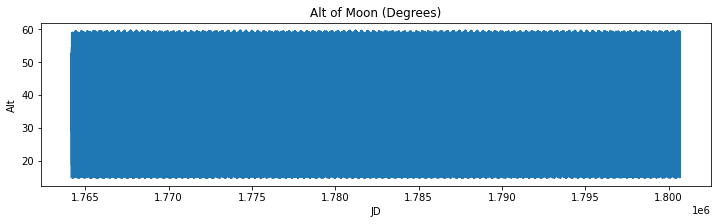

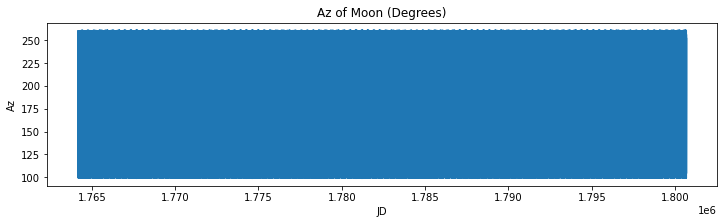

In [23]:
temp()